In [5]:
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/Users/weijiechua/Desktop/ImperialClasses/Courses/Term3/wj_SATbot2.0')

In [6]:
# 1 for Lisa's version of fluency and novelty
# 2 for my version of fluency and novelty
version = 1

In [7]:
import pandas as pd
import numpy as np

In [8]:
from model import classifiers

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/weijiechua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/weijiechua/opt/anaconda3/envs/sat_chatbot/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Some weights of the model checkpoint at distilbert-base-uncased

/Users/weijiechua/Desktop/ImperialClasses/Courses/Term3/wj_SATbot2.0


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/weijiechua/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df = pd.read_excel("../data/survey_data/combined_data/sat_data_combined.xlsx", index_col=0)

In [10]:
df

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,I01,I02,I03,I04,J01,J02,J03,J04,J05,K01
0.0,How do you feel?,Can I know if the predicted emotion is correct?,Is the emotion positive or negative?,Let us practice Exercise 9 to overcome negativ...,Do you feel compassionate toward your childhoo...,Amazing! Do you feel you want to protect your ...,Congratulations! You have shown tender compass...,Congratulations! You have shown foresighted co...,"Now, it is time to bring compassion to the nex...",Now it is time for you to use your compassion ...,...,Have you research through existing solutions?,It's okay. Please set a new deadline to yourse...,Is there a reasonably good solution?,Think about how do you plan to achieve this. W...,Have you followed through your solution?,Try to reflect on what went wrong in the secon...,Please find a partner that can complete the so...,What do you feel about your compassion energy?...,Write down a blog post sharing your success st...,"Thank you for your cooperation today, I apprec..."
1.0,How are you feeling?,Is the predicted emotion correct?,Do you feel more positive or negative?,Let us start practicing Exercise 9 to overcome...,Do you feel you are compassionate towards your...,Great job! Do you feel like you want to protec...,Congratulations! You have shown tender compass...,Congratulations! You have shown foresighted co...,"Now, let us bring compassion to next level. Pl...",Now it is time to use compassion energy meanin...,...,Have you thought about some possible solutions?,That's totally fine. Let's set a new deadline ...,Are there any helpful solutions?,Think carefully about how you can achieve your...,Did you follow through with your plan?,Think about why it might have gone differently...,It is important to find a partner that you can...,What are your thoughts on your compassion energy?,Share about your experience and thoughts on yo...,Thank you so much for your time and cooperatio...
2.0,How are you feeling today?,What do you think about the results? Do you th...,Do you think that you are feeling more positiv...,"Now, let's take a moment to go through Exercis...",Are you being kind to your childhood self?,That's wonderful to hear. Between protecting y...,Good news! You have clearly demonstrated some ...,How lovely! You have strong feelings of foresi...,Let's take a step further to develop ourselves...,Why don't we put your compassion skills to goo...,...,Have you researched through the existing solut...,"That is alright. You may set a new deadline, a...",Is there a reasonably good solution?,Visualise how you plan to achieve this. When d...,Have you followed through with your solution?,Try to think back and reflect on what might ha...,You can find a partner to complete the solutio...,What do you feel about your compassion energy?...,Write down a blog post sharing your success st...,"Thanks so much for talking with me, I really h..."
3.0,How are you doing?,Did I predict the right emotion?,Do you feel good or bad?,Let's try Exercise 9 to see if it helps!,Do you feel compassion towards your childhood ...,Great job! Do you feel like protecting your ch...,Nice job! You've shown tender compassion. It i...,Good job! You've shown foresighted compassion ...,Now let's bring your compassion up to the next...,Time to use your compassion for good in the re...,...,Did you research for solutions that exist today?,"That is fine! However, please set a deadline, ...",Is there a decent solution?,Think about a plan on how you can achieve this...,Did you commit and follow through your solution?,What went wrong in the second stage?,You can start looking for a partner that can c...,What is your feeling towards compassion energy...,Let us write down a blog post discussing your ...,Thank you for today. See you again soon.
4.0,How are you feeling right now?,Did I guess your emotion correctly?,Are you feeling positive or negative?,Let’s do Exercise 9 together to get over the n...,Do you feel compassion towards your childhood

In [11]:
df = df[:10]

In [12]:
df_col = list(df['A01'].dropna().values)

In [13]:
df_col

['How do you feel?',
 'How are you feeling?',
 'How are you feeling today?',
 'How are you doing?',
 'How are you feeling right now?',
 'How are you doing today?',
 'How do you feel?',
 'How do you feel?',
 'Do you feel alright?',
 'How are you feeling now?',
 "May I know how you're feeling today?"]

In [14]:
df_col

['How do you feel?',
 'How are you feeling?',
 'How are you feeling today?',
 'How are you doing?',
 'How are you feeling right now?',
 'How are you doing today?',
 'How do you feel?',
 'How do you feel?',
 'Do you feel alright?',
 'How are you feeling now?',
 "May I know how you're feeling today?"]

In [15]:
A02 = df.loc[:, ['A02']].dropna()

In [16]:
A02.columns = ['sentences']

In [17]:
A02

,sentences
0.0,Can I know if the predicted emotion is correct?
1.0,Is the predicted emotion correct?
2.0,What do you think about the results? Do you th...
3.0,Did I predict the right emotion?
4.0,Did I guess your emotion correctly?
5.0,Was the predicted emotion correct?
6.0,Would you say that's an accurate prediction of...
7.0,Do you think this is how you feel at this time?
8.0,Are you feeling what I am describing?
9.0,May I ask if you think the predicted emotion i...


In [18]:
df_col

['How do you feel?',
 'How are you feeling?',
 'How are you feeling today?',
 'How are you doing?',
 'How are you feeling right now?',
 'How are you doing today?',
 'How do you feel?',
 'How do you feel?',
 'Do you feel alright?',
 'How are you feeling now?',
 "May I know how you're feeling today?"]

## Use Classifiers

In [19]:
classifiers.compute_distances(df_col[0], A02)

[2.5, 2.5, 1.9375, 2.5, 2.5, 2.5, 2.125, 1.75, 2.3125, 2.3125, 2.5]

In [20]:
#classifiers.get_sentence_score(df_col[0], A02)

## Full Code Simulation

In [21]:
curr_sentence = df_col[0]

In [22]:
prev_df = pd.DataFrame([curr_sentence],columns=['sentences'])

In [23]:
prev_df['score'] = 0

In [24]:
prev_df

,sentences,score
0,How do you feel?,0


In [25]:
df_columns = df.columns

In [26]:
full_empathy_list = []
full_fluency_list = []
full_novelty_list = []

for i, col in enumerate(df_columns):
    print("==============================Current column: {col}=======================================")
    possible_options = pd.DataFrame(df.loc[:, [col]].dropna())
    best_score = 0
    empathy_list = []
    fluency_list = []
    novelty_list = []
    for index, row in possible_options.iterrows():
        sentence = row.values[0]
        empathy = classifiers.empathy_score(sentence)
        fluency = classifiers.fluency_score(sentence, version)
        novelty = classifiers.novelty_score(sentence, prev_df, version)
        score = empathy + 0.75*fluency + 2*novelty
        
        empathy_list.append(empathy.item())
        fluency_list.append(fluency)
        novelty_list.append(novelty)
        #score = classifiers.get_sentence_score(sentence, prev_df)
        
        if score > best_score:
            best_sentence = sentence
            best_score = score
    print(f"Best sentence: {best_sentence}, {'{:.2f}'.format(best_score.cpu())}")
    best_score = best_score.detach().numpy()
    s2 = pd.DataFrame.from_records([{"sentences": best_sentence, "score": best_score}])
    prev_df = pd.concat([prev_df, s2], ignore_index=True)
    #prev_df = prev_df.append({"sentences": best_sentence}, ignore_index=True)
    
    full_empathy_list.append(empathy_list)
    full_fluency_list.append(fluency_list)
    full_novelty_list.append(novelty_list)

==============================Current column: {col}=======================================
Best sentence: How are you feeling right now?, 2.40
==============================Current column: {col}=======================================
Best sentence: Am I right to say that you're feeling the following emotion?, 3.03
==============================Current column: {col}=======================================
Best sentence: Do you think that you are feeling more positively or negatively?, 2.37
==============================Current column: {col}=======================================
Best sentence: Now, let's take a moment to go through Exercise 9 so that I can help you better understand how to overcome any negative feelings that you might be experiencing., 3.12
==============================Current column: {col}=======================================
Best sentence: Are you being kind to your childhood self?, 2.47
==============================Current column: {col}============================

Best sentence: Let us do Exercise 8. This is really helpful!, 2.50
==============================Current column: {col}=======================================
Best sentence: If you could help them, how would you do it?, 2.78
==============================Current column: {col}=======================================
Best sentence: Congratulations! By expecting the child to deal with the situation in a mature way, you've shown foresighted compassion. You are now able to develop long-term, sustainable solutions. Let's move on to MAIN NODE for meaningful actions., 3.04
==============================Current column: {col}=======================================
Best sentence: Now think about this. Sometimes children make unreasonable requests. When they don't get it, they will be upset. It is the responsibility of our adult self to teach them to bear with it, and deal with the situation with maturity. Let us practice exercises 17 and 18 (Identifying personal resentments and committing to constr

Best sentence: Thank you so much for taking part in this session, I really appreciate your time. I'll see you soon!, 3.56


In [27]:
prev_df

,sentences,score
0,How do you feel?,0
1,How are you feeling right now?,2.405
2,Am I right to say that you're feeling the foll...,3.0300002
3,Do you think that you are feeling more positiv...,2.3725
4,"Now, let's take a moment to go through Exercis...",3.115
...,...,...
61,Try to think back and reflect on what might ha...,3.13
62,It is important to find a partner that you can...,3.2
63,What do you feel about your compassion energy?...,3.045
64,Share about your experience and thoughts on yo...,3.0625


In [28]:
full_fluency_list

[[0.38, 0.53, 0.53, 0.63, 0.86, 0.58, 0.38, 0.38, 0.09, 0.47, 0.18],
 [0.03, 0.01, 0.16, 0.03, 0.01, 0.01, 0.25, 0.38, 0.17, 0.06, 0.12],
 [0.07, 0.12, 0.15, 0.13, 0.11, 0.19, 0.23, 0.07, 0.1, 0.07, 0.23],
 [0.03, 0.02, 0.34, 0.11, 0.02, 0.01, 0.04, 0.12, 0.02, 0.1, 0.13],
 [0.07, 0.09, 0.09, 0.07, 0.07, 0.12, 0.13, 0.07, 0.06, 0.07, 0.06],
 [0.13, 0.15, 0, 0.17, 0.2, 0, 0, 0.21, 0.07, 0, 0],
 [0, 0, 0.06, 0.03, 0, 0, 0, 0, 0, 0, 0.14],
 [0, 0, 0, 0, 0.03, 0, 0, 0, 0, 0.01, 0.02],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.01, 0, 0.09, 0.06, 0.05, 0.07, 0, 0.01, 0.06, 0, 0],
 [0.11, 0.13, 0.16, 0.21, 0.21, 0.14, 0.11, 0.11, 0.36, 0.1, 0.1],
 [0, 0, 0, 0, 0.01, 0, 0, 0, 0, 0, 0],
 [0.09, 0.09, 0.59, 0.25, 0.1, 0.08, 0.08, 0.09, 0.22, 0.05, 0.15],
 [0.05, 0.06, 0.11, 0.16, 0.11, 0.2, 0.11, 0.1, 0.09, 0.15, 0.15],
 [0.18, 0.21, 0.12, 0.23, 0.11, 0.25, 0.25, 0.24, 0.17, 0.22, 0.19],
 [0.02, 0.01, 0.2, 0.02, 0.01, 0.11, 0.02, 0.02, 0.02, 0.11, 0.12],
 [0, 0, 0.16, 0, 0, 0, 0, 0, 0.05, 0.05, 0.

In [29]:
full_novelty_list

[[0.0, 0.88, 0.88, 0.88, 0.88, 0.88, 0.0, 0.0, 0.37, 0.88, 0.94],
 [1.0, 1.0, 0.78, 0.99, 1.0, 1.0, 0.9, 0.74, 0.83, 0.95, 0.97],
 [0.98, 0.78, 0.88, 0.78, 0.87, 0.99, 0.96, 0.98, 0.99, 0.98, 0.96],
 [1.0, 1.0, 0.93, 1.0, 0.96, 1.0, 1.0, 0.9, 1.0, 0.97, 0.97],
 [0.85, 0.84, 0.95, 0.85, 0.85, 0.86, 0.85, 0.85, 0.91, 0.85, 0.78],
 [0.82, 0.84, 0.9, 0.85, 0.84, 0.85, 0.84, 0.82, 0.91, 0.85, 0.77],
 [0.93, 0.98, 0.93, 0.95, 0.94, 0.93, 0.93, 0.93, 0.97, 0.93, 0.96],
 [0.92, 0.92, 0.94, 0.9, 0.94, 0.93, 0.92, 0.92, 0.94, 0.92, 0.95],
 [0.97, 0.98, 0.99, 0.97, 0.97, 0.99, 0.97, 0.98, 0.97, 0.98, 0.98],
 [0.97, 0.99, 0.99, 0.99, 0.99, 0.98, 0.99, 0.97, 0.99, 0.96, 0.97],
 [0.98, 0.98, 0.98, 0.97, 0.98, 0.98, 0.98, 0.98, 0.97, 0.98, 0.98],
 [0.95, 0.95, 0.97, 0.98, 0.97, 0.98, 0.98, 0.95, 0.95, 0.97, 0.98],
 [0.98, 0.98, 0.98, 0.97, 0.99, 0.99, 0.99, 0.98, 0.97, 0.97, 0.98],
 [0.95, 0.97, 0.93, 0.91, 0.93, 0.9, 0.96, 0.94, 0.92, 0.93, 0.97],
 [0.96, 0.97, 0.95, 0.98, 0.98, 0.95, 0.95, 0.95, 0.

In [30]:
type(full_empathy_list[0])

list

In [31]:
full_empathy_list_np = np.array(full_empathy_list)
full_fluency_list_np = np.array(full_fluency_list)
full_novelty_list_np = np.array(full_novelty_list)

In [32]:
#full_empathy_list_np

In [33]:
np.max(full_fluency_list_np, axis=1)

array([0.86, 0.38, 0.23, 0.34, 0.13, 0.21, 0.14, 0.03, 0.  , 0.09, 0.36,
       0.01, 0.59, 0.2 , 0.25, 0.2 , 0.16, 0.19, 0.12, 0.13, 0.04, 0.11,
       0.  , 0.35, 0.39, 0.28, 0.06, 0.32, 0.18, 0.22, 0.14, 0.13, 0.52,
       0.13, 0.14, 0.16, 0.08, 0.36, 0.35, 0.32, 0.41, 0.64, 0.26, 0.17,
       0.12, 0.37, 0.31, 0.14, 0.42, 0.43, 0.09, 0.15, 0.13, 0.  , 0.05,
       0.16, 0.32, 0.36, 0.13, 0.25, 0.38, 0.32, 0.21, 0.11, 0.77])

In [34]:
np.min(full_fluency_list_np, axis=1)

array([0.09, 0.01, 0.07, 0.01, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 ,
       0.  , 0.05, 0.05, 0.11, 0.01, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.11, 0.19, 0.09, 0.  , 0.13, 0.01, 0.06, 0.04, 0.01, 0.2 ,
       0.  , 0.  , 0.  , 0.  , 0.06, 0.03, 0.15, 0.05, 0.04, 0.02, 0.05,
       0.  , 0.05, 0.04, 0.02, 0.07, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.05, 0.03, 0.  , 0.02, 0.05, 0.07, 0.  , 0.  , 0.06])

In [35]:
full_fluency_list_np_diff = np.max(full_fluency_list_np, axis=1) - np.min(full_fluency_list_np, axis=1)

In [36]:
full_fluency_list_np_diff

array([0.77, 0.37, 0.16, 0.33, 0.07, 0.21, 0.14, 0.03, 0.  , 0.09, 0.26,
       0.01, 0.54, 0.15, 0.14, 0.19, 0.16, 0.16, 0.12, 0.13, 0.04, 0.11,
       0.  , 0.24, 0.2 , 0.19, 0.06, 0.19, 0.17, 0.16, 0.1 , 0.12, 0.32,
       0.13, 0.14, 0.16, 0.08, 0.3 , 0.32, 0.17, 0.36, 0.6 , 0.24, 0.12,
       0.12, 0.32, 0.27, 0.12, 0.35, 0.37, 0.09, 0.15, 0.13, 0.  , 0.05,
       0.15, 0.27, 0.33, 0.13, 0.23, 0.33, 0.25, 0.21, 0.11, 0.71])

In [37]:

full_empathy_list_np_diff = np.max(full_empathy_list_np, axis=1) - np.min(full_empathy_list_np, axis=1)
full_fluency_list_np_diff = np.max(full_fluency_list_np, axis=1) - np.min(full_fluency_list_np, axis=1)
full_novelty_list_np_diff = np.max(full_novelty_list_np, axis=1) - np.min(full_novelty_list_np, axis=1)


In [38]:
df_graph = pd.DataFrame({"empathy": full_empathy_list_np_diff, "fluency": full_fluency_list_np_diff, "novelty": full_novelty_list_np_diff})

In [39]:
df_graph.columns = ["empathy", "fluency", "novelty"]

In [40]:
df_graph

,empathy,fluency,novelty
0,0.0,0.77,0.94
1,1.0,0.37,0.26
2,0.5,0.16,0.21
3,1.0,0.33,0.10
4,0.5,0.07,0.17
...,...,...,...
60,1.0,0.33,0.01
61,1.0,0.25,0.01
62,1.0,0.21,0.05
63,1.0,0.11,0.01


In [49]:
df_graph["empathy_weight"] = 1
df_graph["fluency_weight"] = 1
df_graph["novelty_weight"] = 1

In [50]:
df_graph["empathy_total"] = df_graph["empathy"] * df_graph["empathy_weight"]
df_graph["fluency_total"] = df_graph["fluency"] * df_graph["fluency_weight"]
df_graph["novelty_total"] = df_graph["novelty"] * df_graph["novelty_weight"]

In [51]:
df_graph2 = df_graph[["empathy_total", "fluency_total", "novelty_total"]]

In [52]:
df_new_graph = pd.DataFrame(df_graph2.unstack())

In [53]:
df_new_graph = df_new_graph.reset_index()

In [54]:
df_new_graph.columns = ["type", "utterances", "score"]

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

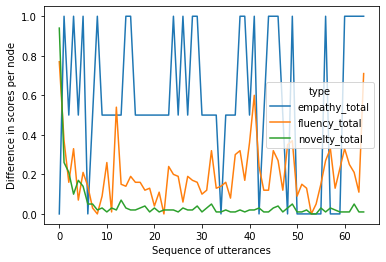

In [56]:
ax = sns.lineplot(data=df_new_graph, x="utterances", y="score", hue="type")
ax.set(xlabel='Sequence of utterances', ylabel='Difference in scores per node')
plt.show()

## Mark the average

In [57]:
full_list = []
for i in range(len(full_empathy_list)):
    avg_empathy = sum(full_empathy_list[i])/len(full_empathy_list[i])
    avg_fluency = sum(full_fluency_list[i])/len(full_fluency_list[i])
    avg_novelty = sum(full_novelty_list[i])/len(full_novelty_list[i])
    avg_total = avg_empathy + avg_fluency + avg_novelty
    temp_list = [avg_empathy, avg_fluency, avg_novelty, avg_total]
    full_list.append(temp_list)

full_list

df_graph = pd.DataFrame(full_list)

df_graph.columns = ["empathy", "fluency", "novelty", "total"]

df_graph.drop(columns="total", inplace=True)

df_graph

,empathy,fluency,novelty
0,0.000000,0.455455,0.599091
1,0.272727,0.111818,0.923636
2,0.045455,0.133636,0.922727
3,0.454545,0.085455,0.975455
4,0.181818,0.081818,0.858182
...,...,...,...
60,0.363636,0.159091,0.986364
61,0.363636,0.121818,0.986364
62,0.545455,0.061818,0.970909
63,0.363636,0.040909,0.983636


In [58]:
df_graph["empathy_weight"] = 1
df_graph["fluency_weight"] = 0.75
df_graph["novelty_weight"] = 2

df_graph["empathy_total"] = df_graph["empathy"] * df_graph["empathy_weight"]
df_graph["fluency_total"] = df_graph["fluency"] * df_graph["fluency_weight"]
df_graph["novelty_total"] = df_graph["novelty"] * df_graph["novelty_weight"]

df_graph2 = df_graph[["empathy_total", "fluency_total", "novelty_total"]]

df_new_graph = pd.DataFrame(df_graph2.unstack())

df_new_graph = df_new_graph.reset_index()

df_new_graph.columns = ["type", "utterances", "score"]

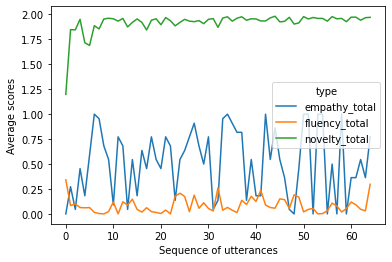

In [59]:
ax = sns.lineplot(data=df_new_graph, x="utterances", y="score", hue="type")
ax.set(xlabel='Sequence of utterances', ylabel='Average scores')
plt.show()